In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

# Data Science and Visualization Imports
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pyproj import Proj

In [6]:
def import_runs(n_runs, area):
    runs = []
    for i in range(n_runs):
        path = 'model_runs/_wc_'+area+'_'+str(i)+'.nc'
        run = xr.open_dataset(path)
        runs.append(run)
    return runs

In [7]:
n_runs = 5

bay_runs = import_runs(n_runs, 'bay')
creek_runs = import_runs(n_runs, 'creek')
interior_runs = import_runs(n_runs, 'interior')

## Water Column Velocities per site

In [131]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4),]

In [134]:
def column_graphs(runtype, n_runs, region_name):
    fig, axs = plt.subplots(n_runs, 1, figsize=(12,25))
    axes = axs.ravel()
    no_model_runs = runtype[0]['Model Runs'].size

    for run in range(n_runs):
        avg_column = runtype[run][['U Velocity', 'Z']].mean(dim='Model Runs').to_dataframe()
        all_runs = runtype[run][['U Velocity', 'Z']].to_dataframe().reset_index().set_index('Model Runs')
        # Fixing Z to bottom for column (switching to water column height from water depth)
        avg_column['Z'] = avg_column['Z'] - avg_column['Z'].min()
        # Plotting Average Column
        avg_column.plot(x='U Velocity', y='Z', color='blue', ax=axes[run])
        for i in range(no_model_runs):
            # Fixing Z to bottom (switching to water column height from water depth)
            new_Z = all_runs.loc[i]['Z'] - all_runs.loc[i]['Z'].min() 
            all_runs.loc[i, 'Z'] = new_Z
            # Plotting
            sample = all_runs.loc[i]
            sample.plot(x='U Velocity', y='Z', color='black', alpha=0.1, ax = axes[run])
        axes[run].legend(custom_lines, ['Average Profile', 'Other Profiles'])
        axes[run].set_title('Run No. '+str(run))
        axes[run].set_ylabel('Water Column Height [m]')
        axes[run].set_xlabel('U velocity [m/s]')
        axes[run].grid()
    fig.suptitle('Water Column Velocities in '+region_name)
    plt.show()

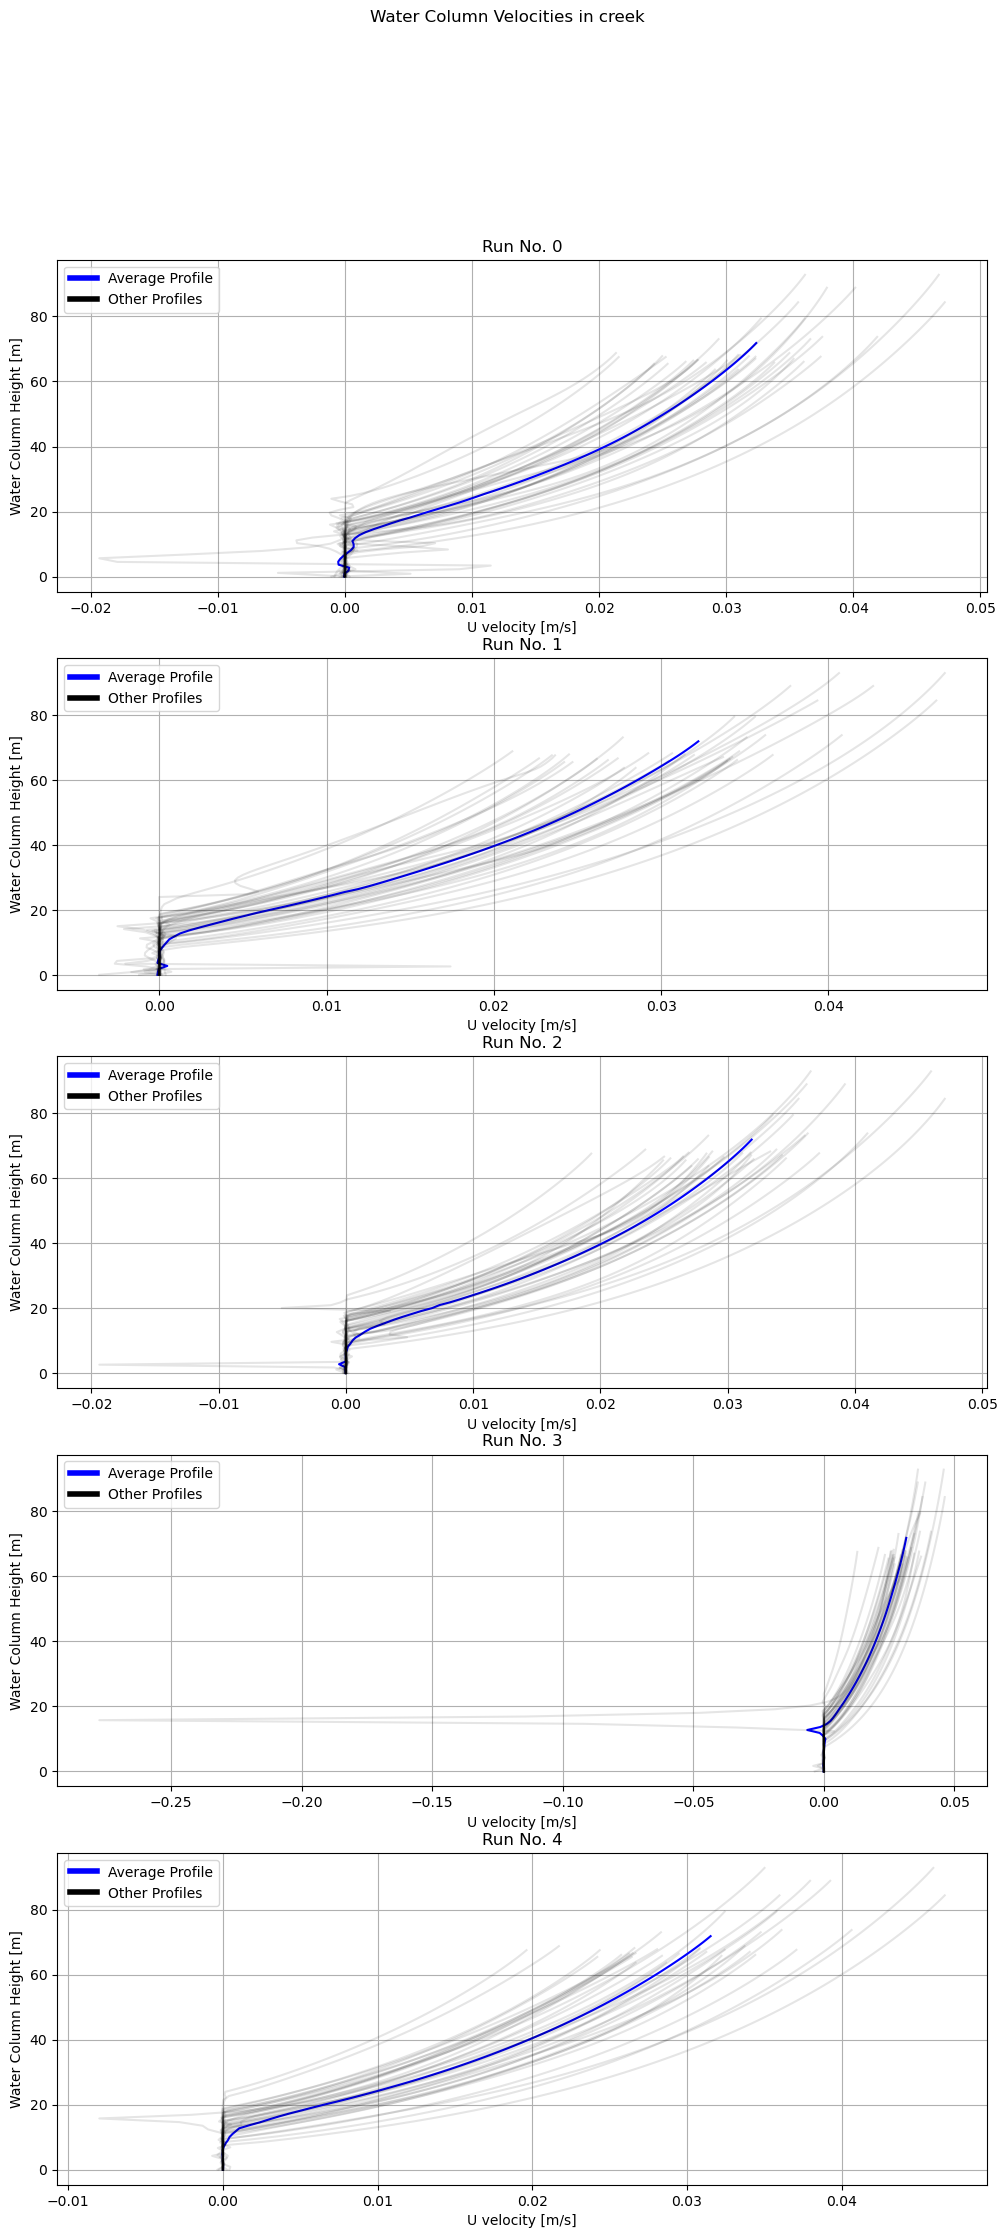

In [135]:
column_graphs(creek_runs, n_runs, 'creek')

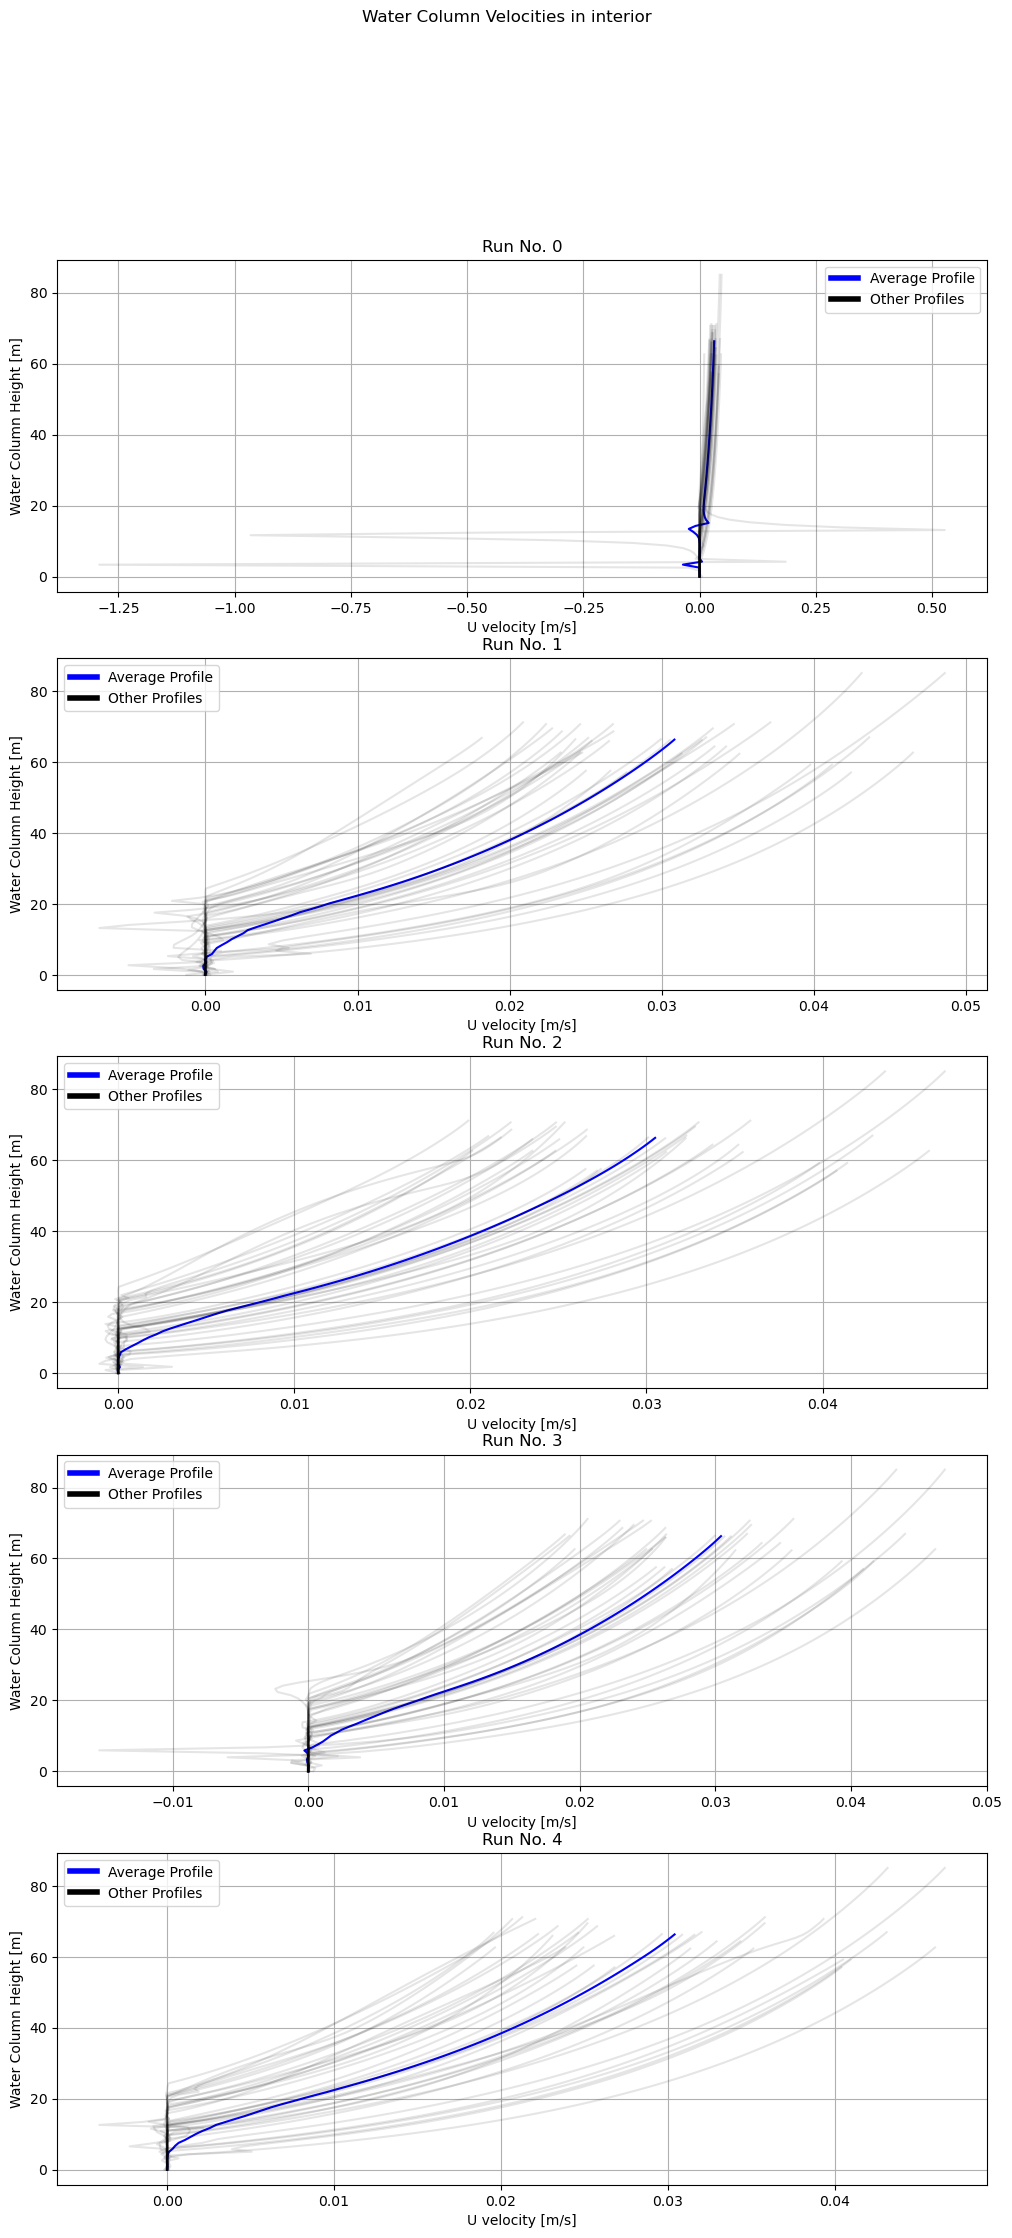

In [136]:
column_graphs(interior_runs, n_runs, 'interior')

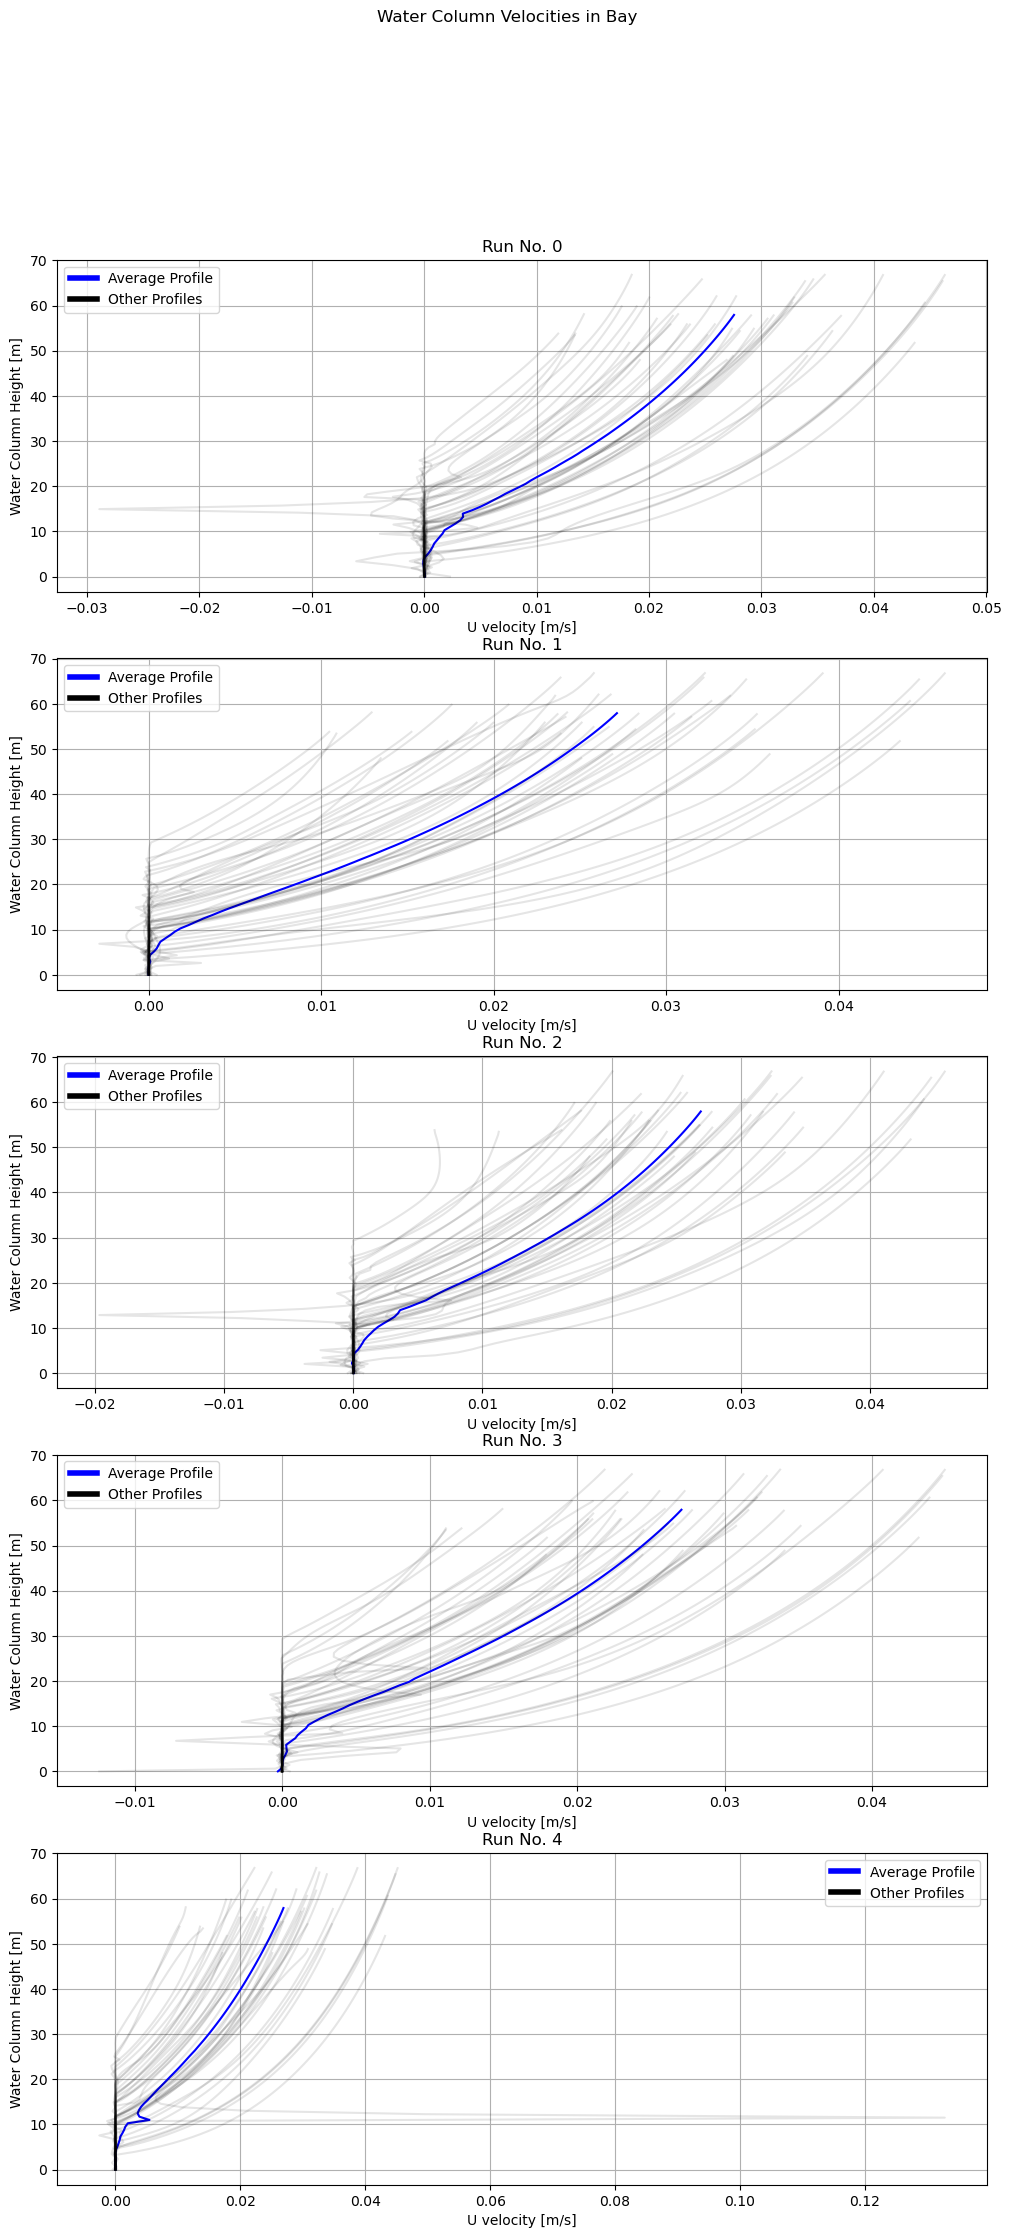

In [137]:
column_graphs(bay_runs, n_runs, 'Bay')

## Violin Plots of Water Columns

In [140]:
bay_runs[0]

<xarray.Dataset>
Dimensions:     (index: 80, Model Runs: 42)
Coordinates:
  * index       (index) int32 0 1 2 3 4 5 6 7 8 9 ... 71 72 73 74 75 76 77 78 79
Dimensions without coordinates: Model Runs
Data variables:
    U Velocity  (Model Runs, index) float64 4.124e-05 -2.412e-05 ... 0.01757
    Q           (Model Runs, index) float64 ...
    Q2          (Model Runs, index) float64 ...
    Q2L         (Model Runs, index) float64 ...
    Z           (Model Runs, index) float64 -67.17 -66.32 ... -1.135 -0.3784
    Kq          (Model Runs, index) float64 ...
    nu_t        (Model Runs, index) float64 ...
Attributes:
    description:  Model run results for Bay site.

In [165]:
a = bay_runs[4]['U Velocity']
a

<xarray.DataArray 'U Velocity' (Model Runs: 42, index: 80)>
array([[-3.520360e-06, -1.272321e-05, -6.123456e-06, ...,  4.473288e-02,
         4.495639e-02,  4.517466e-02],
       [ 5.905021e-06,  1.779630e-05,  2.761240e-05, ...,  2.472903e-02,
         2.491714e-02,  2.510091e-02],
       [ 1.972633e-06,  4.360669e-05, -1.170690e-05, ...,  1.932869e-02,
         1.956260e-02,  1.978976e-02],
       ...,
       [-3.638997e-05,  1.449546e-05,  1.351996e-05, ...,  1.294214e-02,
         1.361045e-02,  1.400267e-02],
       [-4.923758e-06,  1.058800e-04, -1.624799e-06, ...,  2.227557e-02,
         2.248718e-02,  2.269383e-02],
       [ 8.208334e-06,  1.365206e-06, -2.915713e-06, ...,  1.819287e-02,
         1.837055e-02,  1.854285e-02]])
Coordinates:
  * index    (index) int32 0 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78 79
Dimensions without coordinates: Model Runs

In [178]:
bay_runs[4]['U Velocity'].values[25]

array([-9.44179128e-06, -6.27141697e-06, -1.05100900e-05,  7.42458100e-06,
       -1.82536121e-06, -2.15234177e-05,  2.69658746e-05,  1.50328973e-05,
        1.35463197e-05,  1.32086873e-05,  1.28449080e-05,  1.17004611e-05,
        6.76259537e-06, -2.49472688e-05, -4.12350126e-06, -3.17935164e-06,
       -2.76699398e-05,  7.42281119e-04,  1.49577911e-03,  2.30150130e-03,
        3.14708392e-03,  3.99988251e-03,  4.83288089e-03,  5.63110283e-03,
        6.38942469e-03,  7.10858976e-03,  7.79205310e-03,  8.44407321e-03,
        9.06875052e-03,  9.66963916e-03,  1.02496597e-02,  1.08111484e-02,
        1.13559553e-02,  1.18855473e-02,  1.24010996e-02,  1.29035693e-02,
        1.33937522e-02,  1.38723246e-02,  1.43398746e-02,  1.47969234e-02,
        1.52439417e-02,  1.56813600e-02,  1.61095768e-02,  1.65289636e-02,
        1.69398691e-02,  1.73426215e-02,  1.77375310e-02,  1.81248906e-02,
        1.85049777e-02,  1.88780549e-02,  1.92443706e-02,  1.96041600e-02,
        1.99576451e-02,  

In [175]:
violin_df = pd.DataFrame({'Run 0': bay_runs[0]['U Velocity'].values[0],
                          'Run 1': bay_runs[1]['U Velocity'].values[0],
                          'Run 2': bay_runs[2]['U Velocity'].values[0],
                          'Run 3': bay_runs[3]['U Velocity'].values[0],
                          'Run 4': bay_runs[4]['U Velocity'].values[0]})
violin_df

,Run 0,Run 1,Run 2,Run 3,Run 4
0,0.000041,0.000126,-0.000188,-0.000005,-0.000004
1,-0.000024,0.000012,0.000420,0.000156,-0.000013
2,-0.000612,-0.000019,0.000179,-0.000057,-0.000006
3,-0.002842,-0.000037,0.000129,0.000066,0.000095
4,-0.006050,-0.000076,0.000370,0.000032,0.000047
...,...,...,...,...,...
75,0.045425,0.045324,0.044969,0.044080,0.044265
76,0.045657,0.045544,0.045192,0.044301,0.044502
77,0.045882,0.045756,0.045407,0.044516,0.044733
78,0.046099,0.045961,0.045614,0.044725,0.044956


<AxesSubplot: >

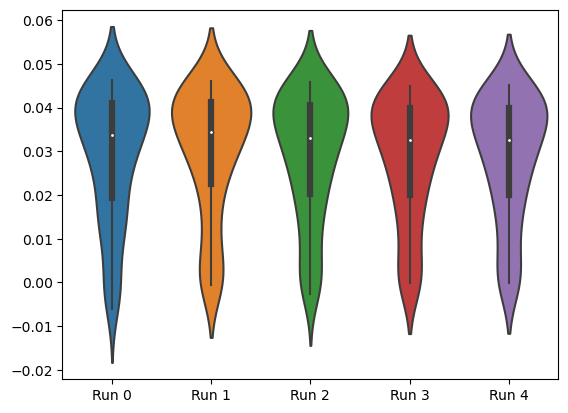

In [176]:
sns.violinplot(violin_df)